<a href="https://colab.research.google.com/github/MartinVIllesca/Curso-teoria-informacion/blob/master/Tarea_Capsula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Cápsula #2: *Representation Learning*

### EL7024 - Teoría de la Información: Fundamentos y Aplicaciones 
### Information and Decision Systems Group

Nombre: Martín Valderrama Illesca

## Preguntas Teóricas:

### P1) Inferencia Variacional

a) A partir del funcional objetivo de Inferencia Variacional $KL(q(\mathbf{z})||p(\mathbf{z}|\mathbf{x}))$ encuentre una cota inferior para el logaritmo de la **evidencia** $log p(x)$ y muestre que esta se puede escribir como:

\begin{equation}
\begin{split}
ELBO(q) &= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{p(\mathbf{x},\mathbf{z})}\} - \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{q(\mathbf{z})}\} \\
&= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{p(\mathbf{x}|\mathbf{z})}\} - KL(q(\mathbf{z})||p(\mathbf{z}))
\end{split}
\end{equation}

b) Explique e interprete la forma de la *Evidence Lower Bound*. En este sentido puede resultarle más fácil considerar la segunda expresión $ELBO(q) = \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{p(\mathbf{x}|\mathbf{z})}\} - KL(q(\mathbf{z})||p(\mathbf{z}))$.

**Hint**: Puede resultarle útil pensar en lo siguiente: ¿Para qué valores de $\mathbf{z}$ o bajo qué criterio cada término de este funcional propicia la asignación de masa en $q(\mathbf{z})$?

c) Explique brevemente por qué los problemas de optimización $\underset{q(\mathbf{z}) \in \mathcal{Q}}{\operatorname{arg min}} KL(q(\mathbf{z})||p(\mathbf{z}|\mathbf{x}))$ y $\underset{q(\mathbf{z}) \in \mathcal{Q}}{\operatorname{arg max}} ELBO(q)$ son equivalentes.

### P2) Information Bottleneck Profundo

En el mismo estilo que estudiamos para los *Autoencoders* Variacionales deduciremos la forma de definir una función de pérdida adecuada para abordar el problema del *Information Bottleneck* por medio de redes neuronales. Para esto, primero reescribimos el problema de la siguiente manera:

\begin{equation}
    \underset{p(\mathbf{z}|\mathbf{x}), p(\mathbf{y}|\mathbf{z})}{\operatorname{max}} R_{IB} = I(\mathbf{Y};\mathbf{Z}) - \beta I(\mathbf{X};\mathbf{Z})
\end{equation}

de modo tal que deduciremos una cota inferior del funcional, siendo $\mathbf{Z}$ la variable latente que comprime la señal de entrada $\mathbf{X}$ y se utiliza en la predicción de $\mathbf{Y}$, y es tal que $\mathbf{Z} - \mathbf{X} - \mathbf{Y}$.

a) Consideremos primero una cota inferior para $I(\mathbf{Y};\mathbf{Z})$. Considerando que $q(\mathbf{y}|\mathbf{z})$ es una aproximación variacional del *decoder* $p(\mathbf{y}|\mathbf{z})$ y el supuesto de Markovianidad demuestre que:

\begin{equation}
    I(\mathbf{Y};\mathbf{Z}) \geq \int_{\mathcal{X}}\int_{\mathcal{Z}}\int_{\mathcal{Y}}p(z|x)p(y|x)p(x)\log q(y|z) dydzdx = \tilde{I}(\mathbf{Y};\mathbf{Z})
\end{equation}

b) Para el término $I(\mathbf{X};\mathbf{Z})$ es necesaria una cota superior. Demuestre que una aproximación variacional $r(\mathbf{z})$ del *prior* $p(\mathbf{z})$ satisface que:

\begin{equation}
    I(\mathbf{X};\mathbf{Z}) \leq \int_{\mathcal{X}}\int_{\mathcal{Z}}\int_{\mathcal{Y}}p(z|x)p(y|x)p(x)\log \frac{p(z|x)}{r(z)} dydzdx = \tilde{I}(\mathbf{X};\mathbf{Z})
\end{equation}

Definamos la cota resultante para $R_{IB}$ por

\begin{equation}
    \mathcal{L}_{IB} = \tilde{I}(\mathbf{Y};\mathbf{Z}) - \beta \tilde{I}(\mathbf{X};\mathbf{Z})
\end{equation}

c) Empleando la distribución conjunta empírica $\tilde{p}(x,y) = \frac{1}{N}\sum_{i=1}^{N}\delta_{x^{(i)}}(x)\delta_{y^{(i)}}(y)$ deduzca que

\begin{equation}
    \mathcal{L}_{IB} \approx \frac{1}{N}\sum_{i=1}^{N}\left[ \mathbb{E}_{\mathbf{Z} \sim p(\mathbf{z}|\mathbf{x})} \left\{ \log q(\mathbf{y}^{(i)}|\mathbf{z}) \right\} - \beta KL\left( p(\mathbf{z}|\mathbf{x}^{(i)}) || r(\mathbf{z}) \right)\right]
\end{equation}

## Preguntas de Simulación:

En esta parte de la tarea deberán implementar y probar el modelo deducido en la pregunta 2 mediante redes neuronales, donde se considera que las aproximaciones variacionales están parametrizadas por una red correspondiente al *encoder* $p_{\theta}(\mathbf{z}|\mathbf{x})$ y otra para el *decoder* $q_{\phi}(\mathbf{y}|\mathbf{z})$, es decir que el funcional a **minimizar** corresponde a:

\begin{equation}
    \begin{split}
        \mathcal{L}'_{IB}(\phi, \theta) &= -\frac{1}{N}\sum_{i=1}^{N}\left[ \mathbb{E}_{\mathbf{Z} \sim p_{\theta}(\mathbf{z}|\mathbf{x})} \left\{ \log q_{\phi}(\mathbf{y}^{(i)}|\mathbf{z}) \right\} - \beta KL\left( p_\theta(\mathbf{z}|\mathbf{x}^{(i)}) || r(\mathbf{z}) \right)\right] \\
        &= \frac{1}{N}\sum_{i=1}^{N}\left[ \mathbb{E}_{\mathbf{Z} \sim p_{\theta}(\mathbf{z}|\mathbf{x})} \left\{ -\log q_{\phi}(\mathbf{y}^{(i)}|\mathbf{z}) \right\} + \beta KL\left( p_\theta(\mathbf{z}|\mathbf{x}^{(i)}) || r(\mathbf{z}) \right)\right]
    \end{split}
\end{equation}

Los experimentos se realizarán sobre el *dataset* MNIST en el problema de **clasificación**.

i) Implemente una clase $\texttt{DeepIB}$ que corresponda a la siguiente arquitectura:

* *Encoder* Gaussiano: Red *fully-connected* $784\to1024\to1024\to2K$, donde K es la dimensionalidad de la variable latente. Los primeros $K$ valores de dicha capa corresponderán a $\mu_{\mathbf{z}}(\mathbf{x})$ y las siguientes $K$ componentes comprenden las desviaciones estándar $\sigma_{\mathbf{z}}(\mathbf{x})$. Entre cada capa debe usar la función de activación $\texttt{ReLU}$.
**Hint**: Para asegurar que las desviaciones estándar $\sigma_{\mathbf{z}}(\mathbf{x})$ sean positivas se recomienda aplicarles la siguiente transformación: 

\begin{equation}
    \sigma_{\mathbf{z}}(\mathbf{x}) = \log (1 + \exp (\sigma_{\mathbf{z}}^{raw}(\mathbf{x}) - 5.0)),
\end{equation}

$\hspace{7mm}$ donde $\sigma_{\mathbf{z}}^{raw}(\mathbf{x})$ denota a la desviación estándar antes de aplicar esta transformación.

* *Decoder*: Red *fully-connected* $K\to10$. Considere que este decoder es determinístico.

Para la Función de Costo considere $r(\mathbf{z}) = \mathcal{N}(\mathbf{z};0,I)$ (es decir que requiere una expresión cerrada para el término de divergencia).

**Hint**: Dado que el *decoder* es determinístico, puede usar la función de *Cross-Entropy* para el primer término, en forma astuta.

ii) Implemente una clase $\texttt{MLP}$ correspondiente a la arquitectura $784\to1024\to1024\to K\to10$ para un mismo valor de $K$ que en el caso de $\texttt{DeepIB}$. Al ser un problema de clasificación puede entrenar con *Cross-Entropy*.

iii) Para $K=2$ y $\beta \in \{10^{-3}, 10^{-1},1\}$, entrene ambos modelos considerando un *loop* de entrenamiento similar al de la Cápsula 2, de tal modo que el *learning rate* del optimizador Adam decaiga en $97\%$ cada $2$ épocas:

$\texttt{lr0 = 10e-4}$

$\texttt{beta1 = 0.5}$

$\texttt{beta2 = 0.999}$

$\texttt{lr_decay = 0.97}$

$\texttt{decay_rate = 2}$

$\texttt{nEpochs = 200}$

Como parámetro $L$ de muestreo para aplicar el *Reparametrization Trick* puede utilizar $L=12$. Si usa la función de Pytorch [$\texttt{torch.nn.CrossEntropyLoss}$](https://pytorch.org/docs/master/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) se recomienda revisar el efecto de usar $\texttt{reduction='none'}$.

Compare y analice la *accuracy* obtenida por los modelos estocásticos obtenidos entre sí y con el modelo $\texttt{MLP}$ clásico.

Además, para los modelos estocásticos, obtenga la proyección de los datos de prueba en el espacio latente $K$-dimensional y analice el efecto de $\beta$ en este resultado.

In [1]:
#%tensorflow_version 1.x
#%load_ext tensorboard

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.distributions as D
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

from copy import deepcopy
from matplotlib import cm
from mpl_toolkits import mplot3d
from torch.utils.data import Dataset, DataLoader, Subset

print(torch.__version__)

1.5.0+cu101


In [2]:
## Batch Sizes
train_batch_size = 100
test_batch_size = 1000

## Train-Val Split
train_dataset_mnist = datasets.MNIST(root='./', train=True, download=True,
                                     transform=transforms.Compose([
                                         transforms.ToTensor()]))

test_dataset_mnist = datasets.MNIST(root='./', train=False, 
                                    transform=transforms.Compose([
                                        transforms.ToTensor()]))

## DataLoaders
train_loader_mnist = torch.utils.data.DataLoader(train_dataset_mnist,
                                                 batch_size = train_batch_size)
test_loader_mnist = torch.utils.data.DataLoader(test_dataset_mnist,
                                                batch_size = test_batch_size)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
lr0 = 10e-4
beta1 = 0.5
beta2 = 0.999
lr_decay = 0.97
decay_rate = 2
nEpochs = 200

In [0]:
class VAE(nn.Module):
  '''Variational Autoencoder model with Gaussian Encoder and Decoder'''
  def __init__(self, zDim, sampling = 1):
    super(VAE, self).__init__()
    self.sampling = sampling
    hDim = 1024

    ## Encoder
    self.fc1 = nn.Sequential(nn.Linear(784, hDim),
                             nn.ReLU())             ## Nonlinear layer
    self.fc2 = nn.Sequential(nn.Linear(hDim, hDim)),
                             nn.ReLU())             ## Nonlinear layer
    


    self.encoder_mu = nn.Linear(hDim, zDim)         ## Encoder for mu
    self.encoder_logvar = nn.Linear(hDim, zDim)     ## Encoder for log-variance                              

    ## Decoder
    self.fc3 = nn.Sequential(nn.Linear(2 * zDim, 10),
                             nn.ReLU())         ## Nonlinear layer
    
    # self.decoder_mu = nn.Linear(hDim, 784)          ## Decoder for mu
    # self.decoder_logvar = nn.Linear(hDim, 784)      ## Decoder for log-variance


  def encode(self, x):
    '''Make inferece of the latent variables Z for X'''
    x = self.fc1(x)
    x = self.fc2(x)
    mu = self.encoder_mu(x)
    sigma = self.encoder_sigma(x)
    return mu, sigma

  def reparametrize(self, mu, logvar):
    '''Reparametrization is required for aproximating expectations during
    training'''
    # aplicar el ajuste a los sigmas
    # se retorna la distribucion de z sobre x

    L = self.sampling
    sigma = torch.exp(0.5 * logvar)
    if not self.training:
      L = 1
    epsilon = torch.randn(list(mu.shape)+[L]).cuda()
    mu = mu.view(list(mu.shape)+[1])
    sigma = sigma.view(list(sigma.shape)+[1])
    z = mu + sigma * epsilon 
    z_ = z.permute(0,2,1)
    return z_

  def decode(self, z):
    '''Reconstruct X from the latent space variables'''
    z = self.fc3(z)
    return z

  def forward(self, x):
    mu_z, sigma_z = self.encode(x)
    z = self.reparametrize(mu_z, sigma_z)

    y = self.decode(z)

    return mu_z, sigma_z, z, y


def fVAELoss(x, mu_z, sigma_z, mu_x, logvar_x, sampling = 1):
  '''Caculate the loss for VAE with Gaussian Encoder and Decoder'''
  K = x.shape[-1]           ## Get dimensionality of X (since it's flattened)
  L = sampling              ## Number of samples to take for each value x
  
  var_z = torch.exp(0.5 * logvar_z)
  var_x = torch.exp(0.5 * logvar_x)
  
  ## Sum over J
  Jterm = 1 + torch.log(var_z) - (mu_z ** 2) - var_z
  Jterm = 0.5 * Jterm.sum(axis = 1).reshape(-1)
                       
  ## Sum over K
  Kterm = torch.log(var_x) + (((x.view([x.shape[0],1,x.shape[1]]) - mu_x) ** 2) / var_x)
  Kterm = 0.5 * Kterm.sum(axis = 1)
  
  ## Sum over L
  Kterm =  -0.5 * K * np.log(2 * np.pi) - Kterm
  Lterm =  Kterm.sum(axis = -1) / L

  ## Sum over M
  Mterm = Lterm + Jterm
  loss = Mterm.sum()

  return loss

In [0]:

zDim = 50
model = VAE(zDim = zDim, sampling = 50).cuda()

optimizer = torch.optim.Adam(model.parameters(), lr0, (beta1, beta2))

Reference images:


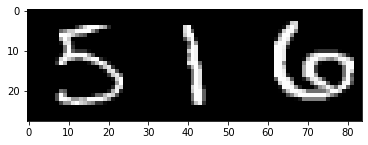

Max value: 1.0, Min value: 0.0

Epoch : 1 || Loss : 1019485.375
Reconstructions:


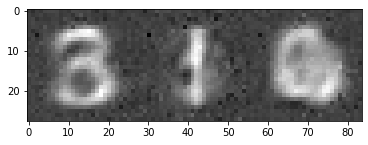

Max value: 0.9607711434364319, Min value: -0.3270176351070404

Epoch : 2 || Loss : 1052166.250
Epoch : 3 || Loss : 1007122.875
Epoch : 4 || Loss : 1111493.875
Epoch : 5 || Loss : 984066.875
Epoch : 6 || Loss : 970655.125
Epoch : 7 || Loss : 976532.500
Epoch : 8 || Loss : 957005.125
Epoch : 9 || Loss : 953528.000
Epoch : 10 || Loss : 945878.875
Epoch : 11 || Loss : 948640.250
Reconstructions:


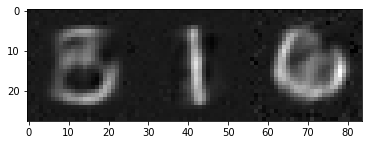

Max value: 1.0329153537750244, Min value: -0.11564560234546661

Epoch : 12 || Loss : 956514.000
Epoch : 13 || Loss : 977582.312
Epoch : 14 || Loss : 971777.938
Epoch : 15 || Loss : 915681.438
Epoch : 16 || Loss : 968856.812
Epoch : 17 || Loss : 982040.750
Epoch : 18 || Loss : 914763.000
Epoch : 19 || Loss : 1020426.125
Epoch : 20 || Loss : 916404.875
Epoch : 21 || Loss : 898781.125
Reconstructions:


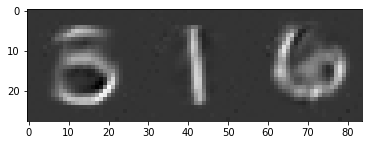

Max value: 1.2017830610275269, Min value: -0.3081307113170624

Epoch : 22 || Loss : 913968.875
Epoch : 23 || Loss : 917009.500
Epoch : 24 || Loss : 924057.250
Epoch : 25 || Loss : 888543.000
Epoch : 26 || Loss : 919176.125
Epoch : 27 || Loss : 891316.562
Epoch : 28 || Loss : 892605.062
Epoch : 29 || Loss : 890001.250
Epoch : 30 || Loss : 938255.000
Epoch : 31 || Loss : 892482.500
Reconstructions:


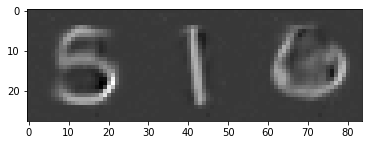

Max value: 1.7490955591201782, Min value: -0.5103996396064758

Epoch : 32 || Loss : 934467.000
Epoch : 33 || Loss : 993945.500
Epoch : 34 || Loss : 879736.250
Epoch : 35 || Loss : 884404.625
Epoch : 36 || Loss : 877972.812
Epoch : 37 || Loss : 877123.625
Epoch : 38 || Loss : 949394.250
Epoch : 39 || Loss : 1082579.000
Epoch : 40 || Loss : 904626.375
Epoch : 41 || Loss : 862943.000
Reconstructions:


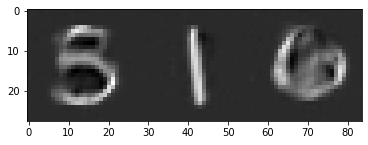

Max value: 1.1757594347000122, Min value: -0.2351149469614029

Epoch : 42 || Loss : 863385.000
Epoch : 43 || Loss : 862127.312
Epoch : 44 || Loss : 892841.625
Epoch : 45 || Loss : 892926.688
Epoch : 46 || Loss : 863063.062
Epoch : 47 || Loss : 1054227.500
Epoch : 48 || Loss : 857171.000
Epoch : 49 || Loss : 855275.625
Epoch : 50 || Loss : 891491.688
Epoch : 51 || Loss : 872377.312
Reconstructions:


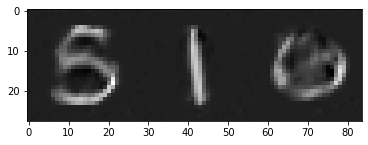

Max value: 1.2991582155227661, Min value: -0.1792653501033783

Epoch : 52 || Loss : 846573.438
Epoch : 53 || Loss : 848487.938
Epoch : 54 || Loss : 870617.250
Epoch : 55 || Loss : 866494.875
Epoch : 56 || Loss : 853987.875
Epoch : 57 || Loss : 853279.562
Epoch : 58 || Loss : 849667.500
Epoch : 59 || Loss : 840338.250
Epoch : 60 || Loss : 885145.000
Epoch : 61 || Loss : 896779.375
Reconstructions:


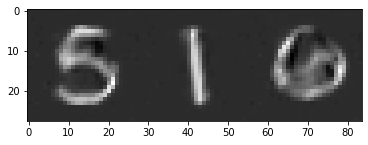

Max value: 1.1984890699386597, Min value: -0.24705347418785095

Epoch : 62 || Loss : 840122.062
Epoch : 63 || Loss : 843107.250
Epoch : 64 || Loss : 835281.812
Epoch : 65 || Loss : 831824.750
Epoch : 66 || Loss : 832910.812
Epoch : 67 || Loss : 836199.625
Epoch : 68 || Loss : 831685.312
Epoch : 69 || Loss : 830341.312
Epoch : 70 || Loss : 845210.625
Epoch : 71 || Loss : 827907.500
Reconstructions:


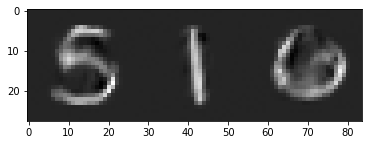

Max value: 1.193582534790039, Min value: -0.19592992961406708

Epoch : 72 || Loss : 851467.750
Epoch : 73 || Loss : 835316.625
Epoch : 74 || Loss : 826477.125
Epoch : 75 || Loss : 839199.875
Epoch : 76 || Loss : 818996.938
Epoch : 77 || Loss : 828095.875
Epoch : 78 || Loss : 886794.625
Epoch : 79 || Loss : 819722.000
Epoch : 80 || Loss : 823576.625
Epoch : 81 || Loss : 818847.312
Reconstructions:


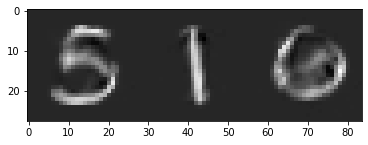

Max value: 1.1175330877304077, Min value: -0.19777970016002655

Epoch : 82 || Loss : 824383.250
Epoch : 83 || Loss : 862401.438
Epoch : 84 || Loss : 828655.000
Epoch : 85 || Loss : 825278.500
Epoch : 86 || Loss : 874094.688
Epoch : 87 || Loss : 821813.875
Epoch : 88 || Loss : 814141.375
Epoch : 89 || Loss : 923935.688
Epoch : 90 || Loss : 812000.125
Epoch : 91 || Loss : 819719.375
Reconstructions:


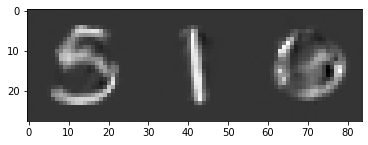

Max value: 1.0304652452468872, Min value: -0.2631964385509491

Epoch : 92 || Loss : 848322.000
Epoch : 93 || Loss : 839781.875
Epoch : 94 || Loss : 808094.938
Epoch : 95 || Loss : 812670.250
Epoch : 96 || Loss : 811273.312
Epoch : 97 || Loss : 824363.375
Epoch : 98 || Loss : 955865.500
Epoch : 99 || Loss : 802921.250
Epoch : 100 || Loss : 816163.812
Epoch : 101 || Loss : 907169.500
Reconstructions:


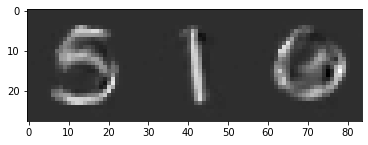

Max value: 1.1354697942733765, Min value: -0.25138965249061584

Epoch : 102 || Loss : 806395.750
Epoch : 103 || Loss : 800915.312
Epoch : 104 || Loss : 825941.875
Epoch : 105 || Loss : 789409.750
Epoch : 106 || Loss : 789993.438
Epoch : 107 || Loss : 805011.938
Epoch : 108 || Loss : 799002.500


In [0]:
print('Reference images:')
img1 = test_loader_mnist.dataset[15][0].numpy()[0]
img2 = test_loader_mnist.dataset[29][0].numpy()[0]
img3 = test_loader_mnist.dataset[54][0].numpy()[0]
img = np.hstack((img1, np.hstack((img2, img3))))
plt.figure()
plt.imshow(img,cmap=cm.gray)
plt.show()
print('Max value: {}, Min value: {}\n'.format(np.amax(img), np.amin(img)))
img1 = torch.from_numpy(img1).reshape(-1,1,784).cuda()
img2 = torch.from_numpy(img2).reshape(-1,1,784).cuda()
img3 = torch.from_numpy(img3).reshape(-1,1,784).cuda()

model.train()
for epoch in range(nEpochs):
  for i, (x_b, y_b) in enumerate(train_loader_mnist):
    x_b = x_b.reshape(train_batch_size, -1).cuda()
    
    optimizer.zero_grad()           ## No olvidar resetear los gradientes

    mu_z, logvar_z, mu_x, logvar_x = model.forward(x_b)

    #loss = -1 *  model.VAELoss(x_b, mu_z, logvar_z, mu_x, logvar_x)
    loss = -1 *  fVAELoss(x_b, mu_z, logvar_z, mu_x, logvar_x, sampling = model.sampling)

    loss.backward()

    optimizer.step()

    #print('Epoch : {} , Step : {}|| Loss : {:.3f}'.format(epoch + 1, i + 1, loss))

  print('Epoch : {} || Loss : {:.3f}'.format(epoch + 1, loss))

  if epoch % decay_rate == 1:
    optimizer.param_groups[0]['lr'] *= lr_decay

  if epoch % 10 == 0:
    example = model.fc1[0].weight.grad
    #print(model.fc1[0].weight.grad)
    #print(model.encoder_mu.weight.grad)
    #print(model.fc2[0].weight)
    model.eval()
    print('Reconstructions:')
    c_img1 = img1.view(1,-1)
    _, _, rec1, _ = model.forward(c_img1)
    rec1 = rec1.cpu().detach().numpy().reshape(28,28)
    c_img2 = img2.view(1,-1)
    _, _, rec2, _ = model.forward(c_img2)
    rec2 = rec2.cpu().detach().numpy().reshape(28,28)
    c_img3 = img3.view(1,-1)
    _, _, rec3, _ = model.forward(c_img3)
    rec3 = rec3.cpu().detach().numpy().reshape(28,28)
    img = np.hstack((rec1, np.hstack((rec2, rec3))))
    plt.figure()
    plt.imshow(img,cmap=cm.gray)
    plt.show()
    print('Max value: {}, Min value: {}\n'.format(np.amax(img), np.amin(img)))
    model.train()

model.eval()
print('Reconstructions:')
c_img1 = img1.view(1,-1)
_, _, rec1, _ = model.forward(c_img1)
rec1 = rec1.cpu().detach().numpy().reshape(28,28)
c_img2 = img2.view(1,-1)
_, _, rec2, _ = model.forward(c_img2)
rec2 = rec2.cpu().detach().numpy().reshape(28,28)
c_img3 = img3.view(1,-1)
_, _, rec3, _ = model.forward(c_img3)
rec3 = rec3.cpu().detach().numpy().reshape(28,28)
img = np.hstack((rec1, np.hstack((rec2, rec3))))
plt.figure()
plt.imshow(img,cmap=cm.gray)
plt.show()
print('Max value: {}, Min value: {}\n'.format(np.amax(img), np.amin(img)))